In [1]:
import numpy as np
import matplotlib.pyplot as plt

import axion_motion
import transport_equation
import model
from common import cosmology

In [2]:
# 5min 13s

In [3]:
# choose parameter "equivalent" to the paper
T_osc = 1e13
T_dec = 1e11
T_RH = 1e15
m_a = 2 * cosmology.calc_hubble_parameter(cosmology.calc_radiation_energy_density(T_osc))
decay_rate = cosmology.calc_hubble_parameter(cosmology.calc_radiation_energy_density(T_dec))

In [4]:
m = model.AxionBaryogenesisModel(transport_equation.source_vector_weak_sphaleron, axion_motion.axion_rhs_simple, 
                                     axion_motion.calc_d2Vdtheta2_simple, decay_rate, (m_a,))
# res = model.start(m, T_RH, (1, 0), T_end=1.672894e+11) 
res = model.start(m, T_RH, (1, 0), calc_axion_mass=axion_motion.calc_const_axion_mass)

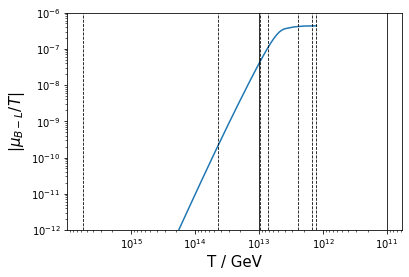

In [5]:
plt.loglog(res.T, -res.red_chem_B_minus_L)
plt.ylim(1e-12, 1e-6)
plt.gca().invert_xaxis()
plt.xlabel("T / GeV", fontsize=15)
plt.ylabel(r"$|\mu_{B - L} / T|$", fontsize=15)
plt.axvline(T_osc, color="black", lw=0.8)
plt.axvline(T_dec, color="black", lw=0.8)
for T in model.T_eqs: plt.axvline(T, ls="--", color="black", lw=.8)
#plt.axvline(T_end, color="red")

Text(0, 0.5, '$\\dot{\\theta} / T$')

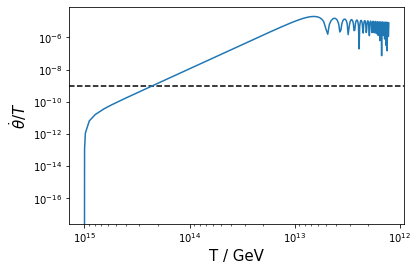

In [6]:
plt.axhline(1e-9, color="black", ls="--")
plt.loglog(res.T, np.abs(res.axion[1] / res.T))
plt.gca().invert_xaxis()
plt.xlabel("T / GeV", fontsize=15)
plt.ylabel(r"$\dot{\theta} / T$", fontsize=15)

In [8]:
%time model.solve(m, T_RH, (1, 0), calc_axion_mass=axion_motion.calc_const_axion_mass, debug=True)

delta: 2.000000e+00 0.0 -4.298470598200644e-07
T: 1.270354e+12
delta: 9.602497e-03 -4.256497761424156e-07 -4.2975679583619175e-07
CPU times: user 784 ms, sys: 3.79 ms, total: 787 ms
Wall time: 779 ms


1.0129940953869494e-07